# Q1 Decision Trees

In this exercise, you will implement a decision tree from scratch and apply it to the task of classifying whether a mushroom is edible or poisonous.

# Outline
- [ 1 - Packages ](#1)
- [ 2 -  Problem Statement](#2)
- [ 3 - Dataset](#3)
  - [ 3.1 One hot encoded dataset](#3.1)
- [ 4 - Decision Tree Refresher](#4)
  - [ 4.1  Calculate entropy](#4.1)
    - [ Exercise 1](#ex01)
  - [ 4.2  Split dataset](#4.2)
    - [ Exercise 2](#ex02)
  - [ 4.3  Calculate information gain](#4.3)
    - [ Exercise 3](#ex03)
  - [ 4.4  Get best split](#4.4)
    - [ Exercise 4](#ex04)
- [ 5 - Building the tree](#5)


<a name="1"></a>
## 1 - Packages

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](https://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

<a name="2"></a>
## 2 -  Problem Statement

Suppose you are starting a company that grows and sells wild mushrooms.
- Since not all mushrooms are edible, you'd like to be able to tell whether a given mushroom is edible or poisonous based on its physical attributes
- You have some existing data that you can use for this task.

Can you use the data to help you identify which mushrooms can be sold safely?

Note: The dataset used is for illustrative purposes only. It is not meant to be a guide on identifying edible mushrooms.



<a name="3"></a>
## 3 - Dataset

You will start by loading the dataset for this task. The dataset you have collected is as follows:

|                                                     | Cap Color | Stalk Shape | Solitary | Edible |
|:---------------------------------------------------:|:---------:|:-----------:|:--------:|:------:|
| <img src="images/0.png" alt="drawing" width="50"/> |   Brown   |   Tapering  |    Yes   |    1   |
| <img src="images/1.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    Yes   |    1   |
| <img src="images/2.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    No    |    0   |
| <img src="images/3.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    No    |    0   |
| <img src="images/4.png" alt="drawing" width="50"/> |   Brown   |   Tapering  |    Yes   |    1   |
| <img src="images/5.png" alt="drawing" width="50"/> |    Red    |   Tapering  |    Yes   |    0   |
| <img src="images/6.png" alt="drawing" width="50"/> |    Red    |  Enlarging  |    No    |    0   |
| <img src="images/7.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    Yes   |    1   |
| <img src="images/8.png" alt="drawing" width="50"/> |    Red    |   Tapering  |    No    |    1   |
| <img src="images/9.png" alt="drawing" width="50"/> |   Brown   |  Enlarging  |    No    |    0   |


-  You have 10 examples of mushrooms. For each example, you have
    - Three features
        - Cap Color (`Brown` or `Red`),
        - Stalk Shape (`Tapering (as in \/)` or `Enlarging (as in /\)`), and
        - Solitary (`Yes` or `No`)
    - Label
        - Edible (`1` indicating yes or `0` indicating poisonous)

<a name="3.1"></a>
### 3.1 One hot encoded dataset
For ease of implementation, we have one-hot encoded the features (turned them into 0 or 1 valued features)

|                                                    | Brown Cap | Tapering Stalk Shape | Solitary | Edible |
|:--------------------------------------------------:|:---------:|:--------------------:|:--------:|:------:|
| <img src="images/0.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| <img src="images/1.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| <img src="images/2.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| <img src="images/3.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| <img src="images/4.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| <img src="images/5.png" alt="drawing" width="50"/> |     0     |           1          |     1    |    0   |
| <img src="images/6.png" alt="drawing" width="50"/> |     0     |           0          |     0    |    0   |
| <img src="images/7.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| <img src="images/8.png" alt="drawing" width="50"/> |     0     |           1          |     0    |    1   |
| <img src="images/9.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |


Therefore,
- `X_train` contains three features for each example
    - Brown Color (A value of `1` indicates "Brown" cap color and `0` indicates "Red" cap color)
    - Tapering Shape (A value of `1` indicates "Tapering Stalk Shape" and `0` indicates "Enlarging" stalk shape)
    - Solitary  (A value of `1` indicates "Yes" and `0` indicates "No")

- `y_train` is whether the mushroom is edible
    - `y = 1` indicates edible
    - `y = 0` indicates poisonous

In [2]:
X_train = np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])
y_train = np.array([1,1,0,0,1,0,0,1,1,0])

#### View the variables
Let's get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the first few elements of `X_train` and the type of the variable.

In [3]:
print("First few elements of X_train:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First few elements of X_train:
 [[1 1 1]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 1]]
Type of X_train: <class 'numpy.ndarray'>


Now, let's do the same for `y_train`

In [4]:
print("First few elements of y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

First few elements of y_train: [1 1 0 0 1]
Type of y_train: <class 'numpy.ndarray'>


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of `X_train` and `y_train` and see how many training examples you have in your dataset.

In [5]:
print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of X_train is: (10, 3)
The shape of y_train is:  (10,)
Number of training examples (m): 10


<a name="4"></a>
## 4 - Decision Tree Refresher

Next, you will build a decision tree based on the dataset provided.

- Recall that the steps for building a decision tree are as follows:
    - Start with all examples at the root node
    - Calculate information gain for splitting on all possible features, and pick the one with the highest information gain
    - Split dataset according to the selected feature, and create left and right branches of the tree
    - Keep repeating splitting process until stopping criteria is met
  
  
- In this question, you'll implement the following functions, which will let you split a node into left and right branches using the feature with the highest information gain
    - Calculate the entropy at a node
    - Split the dataset at a node into left and right branches based on a given feature
    - Calculate the information gain from splitting on a given feature
    - Choose the feature that maximizes information gain
    
- We'll then use the helper functions you've implemented to build a decision tree by repeating the splitting process until the stopping criteria is met
    - For this question, the stopping criteria we've chosen is setting a maximum depth of 2

<a name="4.1"></a>
### 4.1  Calculate entropy

First, you'll write a helper function called `compute_entropy` that computes the entropy (measure of impurity) at a node.
- The function takes in a numpy array (`y`) that indicates whether the examples in that node are edible (`1`) or poisonous(`0`)

Complete the `compute_entropy()` function below to:
* Compute $p_1$, which is the fraction of examples that are edible (i.e. have value = `1` in `y`)
* The entropy is then calculated as

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$
* Note
    * The log is calculated with base $2$
    
Please complete the `compute_entropy()` function using the previous instructions.

In [6]:
def compute_entropy(y):
    """
    Computes the entropy for

    Args:
       y (ndarray): Numpy array indicating whether each example at a node is
           edible (`1`) or poisonous (`0`)

    Returns:
        entropy (float): Entropy at that node

    """
    # You need to return the following variables correctly

    ### START CODE HERE ###
    if len(y) == 0:
        return 0.
    y_1 = np.sum(y) / len(y)
    if y_1 == 0 or y_1 == 1:
        return 0.
    entropy = - y_1 * np.log2(y_1) - (1 - y_1) * np.log2(y_1)


    ### END CODE HERE ###

    return entropy

<a name="4.2"></a>
### 4.2  Split dataset

Next, you'll write a helper function called `split_dataset` that takes in the data at a node and a feature to split on and splits it into left and right branches. Later in the lab, you'll implement code to calculate how good the split is.

- The function takes in the training data, the list of indices of data points at that node, along with the feature to split on.
- It splits the data and returns the subset of indices at the left and the right branch.
- For example, say we're starting at the root node (so `node_indices = [0,1,2,3,4,5,6,7,8,9]`), and we chose to split on feature `0`, which is whether or not the example has a brown cap.
    - The output of the function is then, `left_indices = [0,1,2,3,4,7,9]` (data points with brown cap) and `right_indices = [5,6,8]` (data points without a brown cap)
    
    
|       |                                                    | Brown Cap | Tapering Stalk Shape | Solitary | Edible |
|-------|:--------------------------------------------------:|:---------:|:--------------------:|:--------:|:------:|
| 0     | <img src="images/0.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| 1     | <img src="images/1.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| 2     | <img src="images/2.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| 3     | <img src="images/3.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |
| 4     | <img src="images/4.png" alt="drawing" width="50"/> |     1     |           1          |     1    |    1   |
| 5     | <img src="images/5.png" alt="drawing" width="50"/> |     0     |           1          |     1    |    0   |
| 6     | <img src="images/6.png" alt="drawing" width="50"/> |     0     |           0          |     0    |    0   |
| 7     | <img src="images/7.png" alt="drawing" width="50"/> |     1     |           0          |     1    |    1   |
| 8     | <img src="images/8.png" alt="drawing" width="50"/> |     0     |           1          |     0    |    1   |
| 9     | <img src="images/9.png" alt="drawing" width="50"/> |     1     |           0          |     0    |    0   |


Please complete the `split_dataset()` function shown below

- For each index in `node_indices`
    - If the value of `X` at that index for that feature is `1`, add the index to `left_indices`
    - If the value of `X` at that index for that feature is `0`, add the index to `right_indices`

In [7]:
def split_dataset(X, node_indices, feature):
    """
    Splits the data at the given node into
    left and right branches

    Args:
        X (ndarray):             Data matrix of shape(n_samples, n_features)
        node_indices (list):     List containing the active indices. I.e, the samples being considered at this step.
        feature (int):           Index of feature to split on

    Returns:
        left_indices (list):     Indices with feature value == 1
        right_indices (list):    Indices with feature value == 0
    """

    # You need to return the following variables correctly
    left_indices = []
    right_indices = []

    ### START CODE HERE ###
    for node_indice in node_indices:
        if X[node_indice][feature] == 1:
            left_indices.append(node_indice)
        else:
            right_indices.append(node_indice)


    ### END CODE HERE ###

    return left_indices, right_indices

<a name="4.3"></a>
### 4.3  Calculate information gain

Next, you'll write a function called `information_gain` that takes in the training data, the indices at a node and a feature to split on and returns the information gain from the split.

Please complete the `compute_information_gain()` function shown below to compute

$$\text{Information Gain} = H(p_1^\text{node})- (w^{\text{left}}H(p_1^\text{left}) + w^{\text{right}}H(p_1^\text{right}))$$

where
- $H(p_1^\text{node})$ is entropy at the node
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies at the left and the right branches resulting from the split
- $w^{\text{left}}$ and $w^{\text{right}}$ are the proportion of examples at the left and right branch, respectively

Note:
- You can use the `compute_entropy()` function that you implemented above to calculate the entropy
- We've provided some starter code that uses the `split_dataset()` function you implemented above to split the dataset

In [8]:
def compute_information_gain(X, y, node_indices, feature):

    """
    Compute the information of splitting the node on a given feature

    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        feature (int):           Index of feature to split on

    Returns:
        cost (float):        Cost computed

    """
    # Split dataset
    left_indices, right_indices = split_dataset(X, node_indices, feature)

    # Some useful variables
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]

    # You need to return the following variables correctly

    ### START CODE HERE ###

    information_gain = (compute_entropy(y_node) -
                        ((len(y_left) / len(y_node)) * compute_entropy(y_left) +
                         (len(y_right) / len(y_node)) * compute_entropy(y_right)))


    ### END CODE HERE ###

    return information_gain

<a name="4.4"></a>
### 4.4  Get best split
Now let's write a function to get the best feature to split on by computing the information gain from each feature as we did above and returning the feature that gives the maximum information gain

Please complete the `get_best_split()` function shown below.
- The function takes in the training data, along with the indices of datapoint at that node
- The output of the function is the feature that gives the maximum information gain
    - You can use the `compute_information_gain()` function to iterate through the features and calculate the information for each feature
If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [14]:
def get_best_split(X, y, node_indices):
    """
    Returns the optimal feature and threshold value
    to split the node data

    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.

    Returns:
        best_feature (int):     The index of the best feature to split
    """

    # Some useful variables
    num_features = X.shape[1]

    # You need to return the following variables correctly
    max_info = -99999
    best_feature = -99999
    ### START CODE HERE ###

    for i in range(X.shape[1]):
        info = compute_information_gain(X, y, node_indices, i)
        if info > max_info:
            best_feature = i
            max_info = info

    ### END CODE HERE ##

    return best_feature

<a name="5"></a>
## 5 - Building the tree

In this section, we use the functions you implemented above to generate a decision tree by successively picking the best feature to split on until we reach the stopping criteria (maximum depth is 2).

In [15]:
# Not graded
tree = []

def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    """
    Build a tree using the recursive algorithm that split the dataset into 2 subgroups at each node.
    This function just prints the tree.

    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        branch_name (string):   Name of the branch. ['Root', 'Left', 'Right']
        max_depth (int):        Max depth of the resulting tree.
        current_depth (int):    Current depth. Parameter used during recursive call.

    """

    # Maximum depth reached - stop splitting
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return

    # Otherwise, get best split and split the data
    # Get the best feature and threshold at this node
    best_feature = get_best_split(X, y, node_indices)

    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))

    # Split the dataset at the best feature
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))

    # continue splitting the left and the right child. Increment current depth
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

 Depth 0, Root: Split on feature: 0
- Depth 1, Left: Split on feature: 2
  -- Left leaf node with indices [0, 1, 4, 7]
  -- Right leaf node with indices [2, 3, 9]
- Depth 1, Right: Split on feature: 1
  -- Left leaf node with indices [5, 8]
  -- Right leaf node with indices [6]


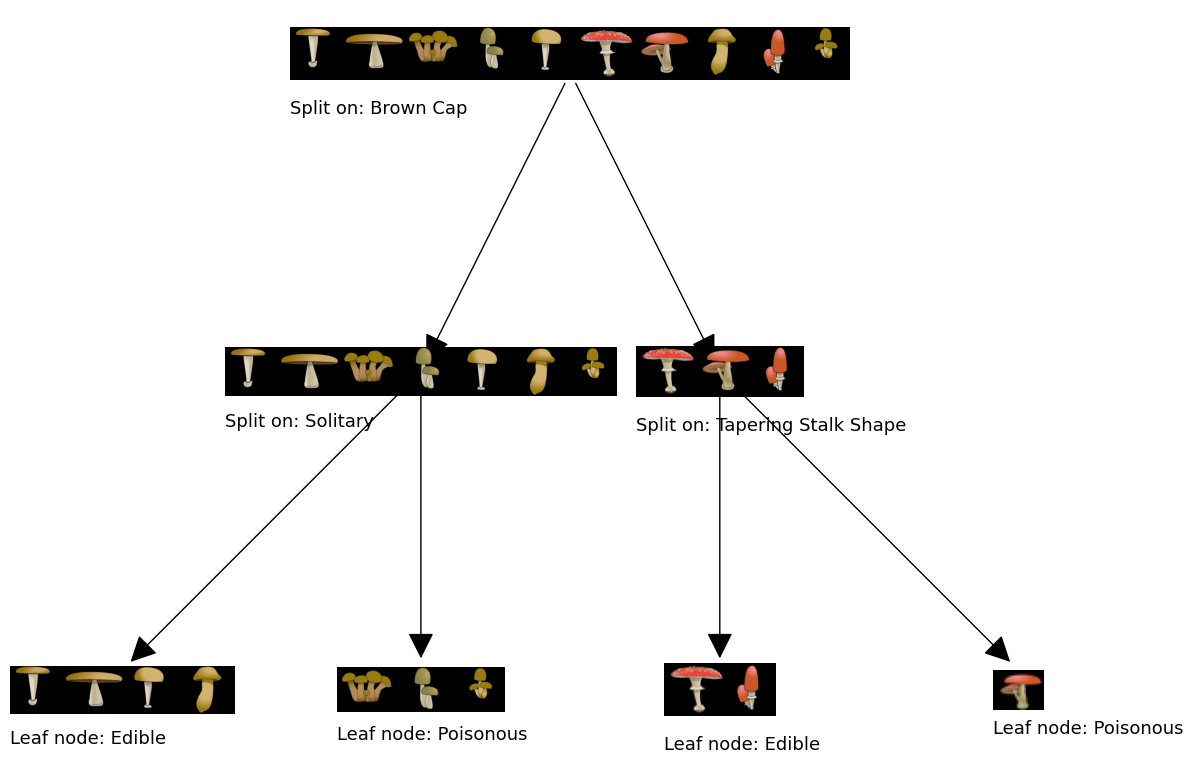

In [16]:
root_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)
generate_tree_viz(root_indices, y_train, tree)